<a href="https://colab.research.google.com/github/peculab/DFTDescriptorPipeline/blob/main/examples/azoarene/azoarene.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
!rm -rf /usr/local/lib/python3.11/dist-packages/descriptors

In [25]:
# ✅ Reset environment
%cd /content
import shutil, os, sys, importlib

# 🔁 Uninstall pip-installed descriptors
!pip uninstall -y descriptors

# 🔥 Clear cached modules
for k in list(sys.modules.keys()):
    if k.startswith("descriptors"):
        del sys.modules[k]

# 🧹 Remove previous repo
if os.path.exists("DFTDescriptorPipeline"):
    shutil.rmtree("DFTDescriptorPipeline")

/content


In [26]:
# ✅ Install required packages
!pip install morfeus-ml scikit-learn joblib matplotlib openpyxl

# ✅ Clone the latest repo
!git clone https://github.com/peculab/DFTDescriptorPipeline.git

Cloning into 'DFTDescriptorPipeline'...
remote: Enumerating objects: 530, done.
remote: Counting objects: 100% (209/209), done.
remote: Compressing objects: 100% (158/158), done.
remote: Total 530 (delta 108), reused 101 (delta 39), pack-reused 321 (from 1)
Receiving objects: 100% (530/530), 35.31 MiB | 23.88 MiB/s, done.
Resolving deltas: 100% (316/316), done.
Updating files: 100% (96/96), done.


In [27]:
# ✅ Set module path
from morfeus import read_xyz, Sterimol
from morfeus.utils import get_radii

import shutil, os, sys, importlib
sys.path.insert(0, "/content/DFTDescriptorPipeline/descriptors")
import extractor_regr
import glob, os
importlib.reload(extractor_regr)

<module 'extractor_regr' from '/content/DFTDescriptorPipeline/descriptors/extractor_regr.py'>

In [28]:
# ✅ Set module path
data_dir = "/content/DFTDescriptorPipeline/examples/azoarene"
xlsx_path = glob.glob(os.path.join(data_dir, "*.xlsx"))[0]
log_folder = os.path.join(data_dir, "logfiles")

In [29]:
import pandas as pd

modified_xlsx_path = "/content/DFTDescriptorPipeline/examples/azoarene/Azoarene_with_Ar.xlsx"

df = pd.read_excel(xlsx_path)

# create Ar = Ar2
df["Ar"] = df["Ar2"]

# Save new file
df.to_excel(modified_xlsx_path, index=False)

print("✔ new xlsx_path =", modified_xlsx_path)

✔ new xlsx_path = /content/DFTDescriptorPipeline/examples/azoarene/Azoarene_with_Ar.xlsx



[STEP1] Read Excel: /content/DFTDescriptorPipeline/examples/azoarene/Azoarene_with_Ar.xlsx

==== [1/26] [2] Processing log: /content/DFTDescriptorPipeline/examples/azoarene/logfiles/2.log ====
  polarizability: 70.39
  HOMO: -0.37129, LUMO: -0.022
  dipole: 2.6275
  nbo_section: ok
Found C1: 7, C2: 5, A: 9, B: 13, D: 8, F: 4, G: 6
  atom index: c=7, e=5, a=9, b=13, d=8, f=4, g=6
  NBO values: 1.99509, -1.03832, 1.97756, -0.87522
  NBO charges: C1=0.77399, C2=0.13815, O1=-0.56532, O2=-0.67085
  frequencies: I_C_O=357.694, v_C_O=1879.0253
  C1, C2, L_C1_C2: (1.801105, 0.280201, 8.5e-05), (0.361925, -0.08129, 0.0), 1.483885043629054

==== [2/26] [3] Processing log: /content/DFTDescriptorPipeline/examples/azoarene/logfiles/3.log ====
  polarizability: 74.82966666666667
  HOMO: -0.34299, LUMO: -0.01557
  dipole: 5.2457
  nbo_section: ok
Found C1: 7, C2: 5, A: 9, B: 14, D: 8, F: 4, G: 6
  atom index: c=7, e=5, a=9, b=14, d=8, f=4, g=6
  NBO values: 1.99504, -1.0154, 1.97931, -0.84057
  NBO 

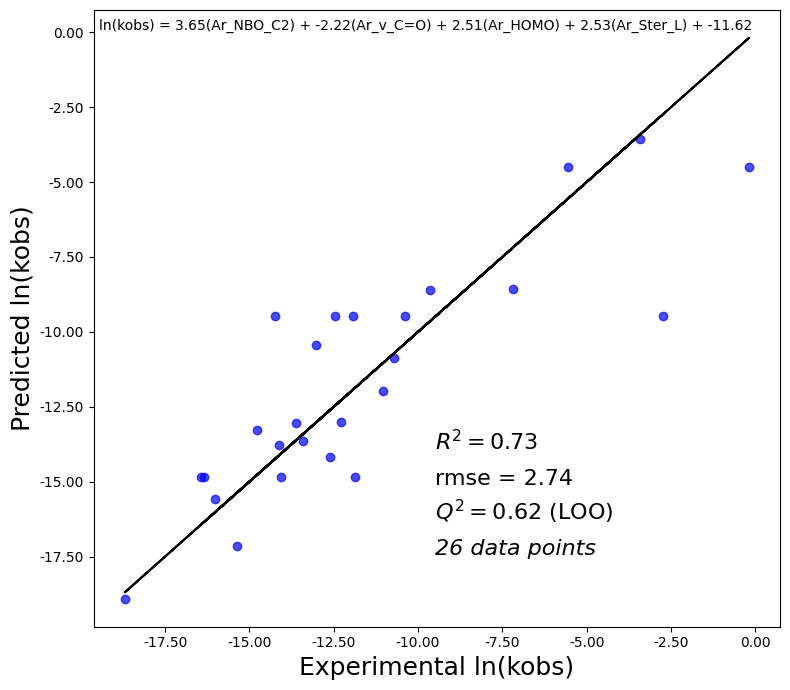


[STEP4] Analysis complete!


In [30]:
# One-click execution
df, results, best_model = extractor_regr.run_full_pipeline(
    log_folder=log_folder,
    xlsx_path=modified_xlsx_path,
    target='ln(kobs)'
)